<h1 align = "center">EEG Autoencoder training</h1>

The aim of this notebook is to perform image generation based on human brain activity. The brain activity was measure by Brain-Computer Interface of Emotiv company.

In [1]:
#Deep learning Keras/Tensorflow  
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
from keras import objectives
from keras.utils import plot_model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Concatenate
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, UpSampling2D, Reshape
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import ELU
from tensorflow.keras.layers import GlobalAveragePooling2D

# Plotting library
import matplotlib.pyplot as plt

#path
import sys
sys.path.append("..")

import os
import numpy as np
import cv2
import datetime

#Custom
import config

Using TensorFlow backend.


# Get preprocessed data

In [2]:
eeg = np.load(os.path.join(config.PREPROCESSED_EEG_DIR,"eeg.npy"))
img = np.load(os.path.join(config.PREPROCESSED_IMG_DIR,"img.npy"))

In [3]:
eeg.shape

(260, 260)

In [4]:
img.shape

(260, 260)

# Reshape data

In [5]:
#Todo 
x = 280 
y = 280 

In [6]:
x_train0=cv2.resize(np.array(eeg),(260, 260))
y_train0=cv2.resize(np.array(img),(x,y))

x_train=x_train0.reshape(1,260,260,1)
y_train=y_train0.reshape(1,x,y)

In [7]:
x_train.shape

(1, 260, 260, 1)

In [8]:
y_train.shape

(1, 280, 280)

# Build model architecture

In [9]:
# jaja
x = 260 
y = 260 

In [10]:
input_shape=(x,y,1)

input_img = Input(batch_shape=(None, x,y,1))
squeeze=Conv2D(128, 3,3,padding='same',input_shape=input_shape)(input_img)
squeeze0=Activation('relu')(squeeze)
squeeze=BatchNormalization()(squeeze)
squeeze=MaxPooling2D(pool_size=(2,2))(squeeze)
squeeze=UpSampling2D(size=(2, 2))(squeeze)

squeeze=Conv2D(128, 3,3, kernel_initializer='glorot_uniform')(squeeze)

squeeze0=Activation('relu')(squeeze)
squeeze0=Dense(100)(squeeze0)
squeeze0=Reshape((280,280))(squeeze0)
squeeze0=Activation('relu')(squeeze0)

model = Model(inputs = input_img, outputs = squeeze0)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 260, 260, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 87, 87, 128)       1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 87, 87, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 43, 43, 128)       0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 86, 86, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 128)       0     

# Callbacks

#### tensorboard

In [12]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

##### checkpointer

In [13]:
filepath="../models/VAE.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True)

# Optimizer

In [14]:
from tensorflow.keras import optimizers

RMS_prop = optimizers.RMSprop(lr=0.00007, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=RMS_prop)

# Training

In [15]:
history = model.fit(x_train, y_train,verbose=0,
        epochs=30000,
        batch_size=1,callbacks=[tensorboard_callback,checkpoint])


Epoch 00001: loss improved from inf to 0.13136, saving model to ../models/VAE.hdf5

Epoch 00002: loss improved from 0.13136 to 0.11743, saving model to ../models/VAE.hdf5

Epoch 00003: loss improved from 0.11743 to 0.11153, saving model to ../models/VAE.hdf5

Epoch 00004: loss improved from 0.11153 to 0.10798, saving model to ../models/VAE.hdf5

Epoch 00005: loss improved from 0.10798 to 0.10560, saving model to ../models/VAE.hdf5

Epoch 00006: loss improved from 0.10560 to 0.10386, saving model to ../models/VAE.hdf5

Epoch 00007: loss improved from 0.10386 to 0.10257, saving model to ../models/VAE.hdf5

Epoch 00008: loss improved from 0.10257 to 0.10157, saving model to ../models/VAE.hdf5

Epoch 00009: loss improved from 0.10157 to 0.10078, saving model to ../models/VAE.hdf5

Epoch 00010: loss improved from 0.10078 to 0.10015, saving model to ../models/VAE.hdf5

Epoch 00011: loss improved from 0.10015 to 0.09961, saving model to ../models/VAE.hdf5

Epoch 00012: loss improved from 0.0


Epoch 00098: loss improved from 0.08444 to 0.08433, saving model to ../models/VAE.hdf5

Epoch 00099: loss improved from 0.08433 to 0.08424, saving model to ../models/VAE.hdf5

Epoch 00100: loss improved from 0.08424 to 0.08413, saving model to ../models/VAE.hdf5

Epoch 00101: loss improved from 0.08413 to 0.08403, saving model to ../models/VAE.hdf5

Epoch 00102: loss improved from 0.08403 to 0.08392, saving model to ../models/VAE.hdf5

Epoch 00103: loss improved from 0.08392 to 0.08383, saving model to ../models/VAE.hdf5

Epoch 00104: loss improved from 0.08383 to 0.08373, saving model to ../models/VAE.hdf5

Epoch 00105: loss improved from 0.08373 to 0.08363, saving model to ../models/VAE.hdf5

Epoch 00106: loss improved from 0.08363 to 0.08354, saving model to ../models/VAE.hdf5

Epoch 00107: loss improved from 0.08354 to 0.08345, saving model to ../models/VAE.hdf5

Epoch 00108: loss improved from 0.08345 to 0.08337, saving model to ../models/VAE.hdf5

Epoch 00109: loss improved from


Epoch 00196: loss improved from 0.07684 to 0.07677, saving model to ../models/VAE.hdf5

Epoch 00197: loss improved from 0.07677 to 0.07670, saving model to ../models/VAE.hdf5

Epoch 00198: loss improved from 0.07670 to 0.07663, saving model to ../models/VAE.hdf5

Epoch 00199: loss improved from 0.07663 to 0.07656, saving model to ../models/VAE.hdf5

Epoch 00200: loss improved from 0.07656 to 0.07649, saving model to ../models/VAE.hdf5

Epoch 00201: loss improved from 0.07649 to 0.07645, saving model to ../models/VAE.hdf5

Epoch 00202: loss improved from 0.07645 to 0.07639, saving model to ../models/VAE.hdf5

Epoch 00203: loss improved from 0.07639 to 0.07635, saving model to ../models/VAE.hdf5

Epoch 00204: loss improved from 0.07635 to 0.07629, saving model to ../models/VAE.hdf5

Epoch 00205: loss improved from 0.07629 to 0.07625, saving model to ../models/VAE.hdf5

Epoch 00206: loss improved from 0.07625 to 0.07620, saving model to ../models/VAE.hdf5

Epoch 00207: loss improved from


Epoch 00296: loss improved from 0.07098 to 0.07092, saving model to ../models/VAE.hdf5

Epoch 00297: loss improved from 0.07092 to 0.07086, saving model to ../models/VAE.hdf5

Epoch 00298: loss improved from 0.07086 to 0.07083, saving model to ../models/VAE.hdf5

Epoch 00299: loss improved from 0.07083 to 0.07079, saving model to ../models/VAE.hdf5

Epoch 00300: loss improved from 0.07079 to 0.07077, saving model to ../models/VAE.hdf5

Epoch 00301: loss improved from 0.07077 to 0.07071, saving model to ../models/VAE.hdf5

Epoch 00302: loss improved from 0.07071 to 0.07067, saving model to ../models/VAE.hdf5

Epoch 00303: loss improved from 0.07067 to 0.07058, saving model to ../models/VAE.hdf5

Epoch 00304: loss improved from 0.07058 to 0.07053, saving model to ../models/VAE.hdf5

Epoch 00305: loss improved from 0.07053 to 0.07046, saving model to ../models/VAE.hdf5

Epoch 00306: loss improved from 0.07046 to 0.07042, saving model to ../models/VAE.hdf5

Epoch 00307: loss improved from


Epoch 00393: loss improved from 0.06611 to 0.06606, saving model to ../models/VAE.hdf5

Epoch 00394: loss improved from 0.06606 to 0.06603, saving model to ../models/VAE.hdf5

Epoch 00395: loss improved from 0.06603 to 0.06596, saving model to ../models/VAE.hdf5

Epoch 00396: loss improved from 0.06596 to 0.06591, saving model to ../models/VAE.hdf5

Epoch 00397: loss improved from 0.06591 to 0.06584, saving model to ../models/VAE.hdf5

Epoch 00398: loss improved from 0.06584 to 0.06580, saving model to ../models/VAE.hdf5

Epoch 00399: loss improved from 0.06580 to 0.06575, saving model to ../models/VAE.hdf5

Epoch 00400: loss improved from 0.06575 to 0.06573, saving model to ../models/VAE.hdf5

Epoch 00401: loss improved from 0.06573 to 0.06568, saving model to ../models/VAE.hdf5

Epoch 00402: loss improved from 0.06568 to 0.06566, saving model to ../models/VAE.hdf5

Epoch 00403: loss improved from 0.06566 to 0.06560, saving model to ../models/VAE.hdf5

Epoch 00404: loss improved from


Epoch 00493: loss improved from 0.06149 to 0.06141, saving model to ../models/VAE.hdf5

Epoch 00494: loss improved from 0.06141 to 0.06138, saving model to ../models/VAE.hdf5

Epoch 00495: loss improved from 0.06138 to 0.06136, saving model to ../models/VAE.hdf5

Epoch 00496: loss did not improve from 0.06136

Epoch 00497: loss did not improve from 0.06136

Epoch 00498: loss did not improve from 0.06136

Epoch 00499: loss did not improve from 0.06136

Epoch 00500: loss did not improve from 0.06136

Epoch 00501: loss improved from 0.06136 to 0.06131, saving model to ../models/VAE.hdf5

Epoch 00502: loss improved from 0.06131 to 0.06118, saving model to ../models/VAE.hdf5

Epoch 00503: loss improved from 0.06118 to 0.06107, saving model to ../models/VAE.hdf5

Epoch 00504: loss improved from 0.06107 to 0.06097, saving model to ../models/VAE.hdf5

Epoch 00505: loss improved from 0.06097 to 0.06090, saving model to ../models/VAE.hdf5

Epoch 00506: loss improved from 0.06090 to 0.06086, sav


Epoch 00610: loss did not improve from 0.05702

Epoch 00611: loss improved from 0.05702 to 0.05700, saving model to ../models/VAE.hdf5

Epoch 00612: loss improved from 0.05700 to 0.05694, saving model to ../models/VAE.hdf5

Epoch 00613: loss improved from 0.05694 to 0.05683, saving model to ../models/VAE.hdf5

Epoch 00614: loss improved from 0.05683 to 0.05671, saving model to ../models/VAE.hdf5

Epoch 00615: loss improved from 0.05671 to 0.05663, saving model to ../models/VAE.hdf5

Epoch 00616: loss improved from 0.05663 to 0.05657, saving model to ../models/VAE.hdf5

Epoch 00617: loss improved from 0.05657 to 0.05654, saving model to ../models/VAE.hdf5

Epoch 00618: loss improved from 0.05654 to 0.05654, saving model to ../models/VAE.hdf5

Epoch 00619: loss did not improve from 0.05654

Epoch 00620: loss did not improve from 0.05654

Epoch 00621: loss did not improve from 0.05654

Epoch 00622: loss did not improve from 0.05654

Epoch 00623: loss improved from 0.05654 to 0.05653, sav


Epoch 00729: loss did not improve from 0.05267

Epoch 00730: loss did not improve from 0.05267

Epoch 00731: loss improved from 0.05267 to 0.05267, saving model to ../models/VAE.hdf5

Epoch 00732: loss improved from 0.05267 to 0.05264, saving model to ../models/VAE.hdf5

Epoch 00733: loss improved from 0.05264 to 0.05247, saving model to ../models/VAE.hdf5

Epoch 00734: loss improved from 0.05247 to 0.05241, saving model to ../models/VAE.hdf5

Epoch 00735: loss improved from 0.05241 to 0.05236, saving model to ../models/VAE.hdf5

Epoch 00736: loss did not improve from 0.05236

Epoch 00737: loss did not improve from 0.05236

Epoch 00738: loss did not improve from 0.05236

Epoch 00739: loss did not improve from 0.05236

Epoch 00740: loss did not improve from 0.05236

Epoch 00741: loss improved from 0.05236 to 0.05232, saving model to ../models/VAE.hdf5

Epoch 00742: loss improved from 0.05232 to 0.05230, saving model to ../models/VAE.hdf5

Epoch 00743: loss improved from 0.05230 to 0.05


Epoch 00851: loss improved from 0.04886 to 0.04877, saving model to ../models/VAE.hdf5

Epoch 00852: loss did not improve from 0.04877

Epoch 00853: loss improved from 0.04877 to 0.04862, saving model to ../models/VAE.hdf5

Epoch 00854: loss did not improve from 0.04862

Epoch 00855: loss improved from 0.04862 to 0.04855, saving model to ../models/VAE.hdf5

Epoch 00856: loss did not improve from 0.04855

Epoch 00857: loss improved from 0.04855 to 0.04852, saving model to ../models/VAE.hdf5

Epoch 00858: loss did not improve from 0.04852

Epoch 00859: loss did not improve from 0.04852

Epoch 00860: loss did not improve from 0.04852

Epoch 00861: loss did not improve from 0.04852

Epoch 00862: loss did not improve from 0.04852

Epoch 00863: loss did not improve from 0.04852

Epoch 00864: loss improved from 0.04852 to 0.04844, saving model to ../models/VAE.hdf5

Epoch 00865: loss improved from 0.04844 to 0.04832, saving model to ../models/VAE.hdf5

Epoch 00866: loss improved from 0.04832


Epoch 00980: loss did not improve from 0.04492

Epoch 00981: loss did not improve from 0.04492

Epoch 00982: loss did not improve from 0.04492

Epoch 00983: loss improved from 0.04492 to 0.04480, saving model to ../models/VAE.hdf5

Epoch 00984: loss did not improve from 0.04480

Epoch 00985: loss improved from 0.04480 to 0.04474, saving model to ../models/VAE.hdf5

Epoch 00986: loss did not improve from 0.04474

Epoch 00987: loss did not improve from 0.04474

Epoch 00988: loss did not improve from 0.04474

Epoch 00989: loss did not improve from 0.04474

Epoch 00990: loss did not improve from 0.04474

Epoch 00991: loss did not improve from 0.04474

Epoch 00992: loss did not improve from 0.04474

Epoch 00993: loss improved from 0.04474 to 0.04468, saving model to ../models/VAE.hdf5

Epoch 00994: loss did not improve from 0.04468

Epoch 00995: loss improved from 0.04468 to 0.04457, saving model to ../models/VAE.hdf5

Epoch 00996: loss did not improve from 0.04457

Epoch 00997: loss impro


Epoch 01117: loss improved from 0.04130 to 0.04115, saving model to ../models/VAE.hdf5

Epoch 01118: loss did not improve from 0.04115

Epoch 01119: loss improved from 0.04115 to 0.04107, saving model to ../models/VAE.hdf5

Epoch 01120: loss did not improve from 0.04107

Epoch 01121: loss did not improve from 0.04107

Epoch 01122: loss did not improve from 0.04107

Epoch 01123: loss did not improve from 0.04107

Epoch 01124: loss did not improve from 0.04107

Epoch 01125: loss improved from 0.04107 to 0.04104, saving model to ../models/VAE.hdf5

Epoch 01126: loss did not improve from 0.04104

Epoch 01127: loss improved from 0.04104 to 0.04101, saving model to ../models/VAE.hdf5

Epoch 01128: loss did not improve from 0.04101

Epoch 01129: loss did not improve from 0.04101

Epoch 01130: loss did not improve from 0.04101

Epoch 01131: loss did not improve from 0.04101

Epoch 01132: loss improved from 0.04101 to 0.04083, saving model to ../models/VAE.hdf5

Epoch 01133: loss improved from


Epoch 01251: loss improved from 0.03793 to 0.03786, saving model to ../models/VAE.hdf5

Epoch 01252: loss did not improve from 0.03786

Epoch 01253: loss did not improve from 0.03786

Epoch 01254: loss did not improve from 0.03786

Epoch 01255: loss did not improve from 0.03786

Epoch 01256: loss did not improve from 0.03786

Epoch 01257: loss improved from 0.03786 to 0.03783, saving model to ../models/VAE.hdf5

Epoch 01258: loss improved from 0.03783 to 0.03760, saving model to ../models/VAE.hdf5

Epoch 01259: loss improved from 0.03760 to 0.03753, saving model to ../models/VAE.hdf5

Epoch 01260: loss improved from 0.03753 to 0.03751, saving model to ../models/VAE.hdf5

Epoch 01261: loss did not improve from 0.03751

Epoch 01262: loss did not improve from 0.03751

Epoch 01263: loss did not improve from 0.03751

Epoch 01264: loss did not improve from 0.03751

Epoch 01265: loss did not improve from 0.03751

Epoch 01266: loss did not improve from 0.03751

Epoch 01267: loss did not impro


Epoch 01390: loss did not improve from 0.03473

Epoch 01391: loss did not improve from 0.03473

Epoch 01392: loss improved from 0.03473 to 0.03468, saving model to ../models/VAE.hdf5

Epoch 01393: loss improved from 0.03468 to 0.03453, saving model to ../models/VAE.hdf5

Epoch 01394: loss improved from 0.03453 to 0.03450, saving model to ../models/VAE.hdf5

Epoch 01395: loss improved from 0.03450 to 0.03448, saving model to ../models/VAE.hdf5

Epoch 01396: loss did not improve from 0.03448

Epoch 01397: loss did not improve from 0.03448

Epoch 01398: loss did not improve from 0.03448

Epoch 01399: loss did not improve from 0.03448

Epoch 01400: loss did not improve from 0.03448

Epoch 01401: loss did not improve from 0.03448

Epoch 01402: loss improved from 0.03448 to 0.03431, saving model to ../models/VAE.hdf5

Epoch 01403: loss improved from 0.03431 to 0.03421, saving model to ../models/VAE.hdf5

Epoch 01404: loss improved from 0.03421 to 0.03416, saving model to ../models/VAE.hdf5



Epoch 01539: loss improved from 0.03156 to 0.03154, saving model to ../models/VAE.hdf5

Epoch 01540: loss did not improve from 0.03154

Epoch 01541: loss improved from 0.03154 to 0.03153, saving model to ../models/VAE.hdf5

Epoch 01542: loss did not improve from 0.03153

Epoch 01543: loss did not improve from 0.03153

Epoch 01544: loss did not improve from 0.03153

Epoch 01545: loss did not improve from 0.03153

Epoch 01546: loss did not improve from 0.03153

Epoch 01547: loss did not improve from 0.03153

Epoch 01548: loss improved from 0.03153 to 0.03133, saving model to ../models/VAE.hdf5

Epoch 01549: loss improved from 0.03133 to 0.03127, saving model to ../models/VAE.hdf5

Epoch 01550: loss did not improve from 0.03127

Epoch 01551: loss did not improve from 0.03127

Epoch 01552: loss did not improve from 0.03127

Epoch 01553: loss did not improve from 0.03127

Epoch 01554: loss did not improve from 0.03127

Epoch 01555: loss did not improve from 0.03127

Epoch 01556: loss did n


Epoch 01689: loss improved from 0.02875 to 0.02872, saving model to ../models/VAE.hdf5

Epoch 01690: loss did not improve from 0.02872

Epoch 01691: loss did not improve from 0.02872

Epoch 01692: loss did not improve from 0.02872

Epoch 01693: loss did not improve from 0.02872

Epoch 01694: loss did not improve from 0.02872

Epoch 01695: loss did not improve from 0.02872

Epoch 01696: loss improved from 0.02872 to 0.02858, saving model to ../models/VAE.hdf5

Epoch 01697: loss improved from 0.02858 to 0.02847, saving model to ../models/VAE.hdf5

Epoch 01698: loss improved from 0.02847 to 0.02843, saving model to ../models/VAE.hdf5

Epoch 01699: loss did not improve from 0.02843

Epoch 01700: loss did not improve from 0.02843

Epoch 01701: loss did not improve from 0.02843

Epoch 01702: loss did not improve from 0.02843

Epoch 01703: loss did not improve from 0.02843

Epoch 01704: loss did not improve from 0.02843

Epoch 01705: loss did not improve from 0.02843

Epoch 01706: loss did n


Epoch 01842: loss did not improve from 0.02608

Epoch 01843: loss did not improve from 0.02608

Epoch 01844: loss did not improve from 0.02608

Epoch 01845: loss improved from 0.02608 to 0.02605, saving model to ../models/VAE.hdf5

Epoch 01846: loss improved from 0.02605 to 0.02599, saving model to ../models/VAE.hdf5

Epoch 01847: loss improved from 0.02599 to 0.02595, saving model to ../models/VAE.hdf5

Epoch 01848: loss did not improve from 0.02595

Epoch 01849: loss did not improve from 0.02595

Epoch 01850: loss did not improve from 0.02595

Epoch 01851: loss did not improve from 0.02595

Epoch 01852: loss did not improve from 0.02595

Epoch 01853: loss did not improve from 0.02595

Epoch 01854: loss did not improve from 0.02595

Epoch 01855: loss did not improve from 0.02595

Epoch 01856: loss did not improve from 0.02595

Epoch 01857: loss did not improve from 0.02595

Epoch 01858: loss did not improve from 0.02595

Epoch 01859: loss did not improve from 0.02595

Epoch 01860: lo


Epoch 01998: loss did not improve from 0.02393

Epoch 01999: loss improved from 0.02393 to 0.02390, saving model to ../models/VAE.hdf5

Epoch 02000: loss improved from 0.02390 to 0.02378, saving model to ../models/VAE.hdf5

Epoch 02001: loss did not improve from 0.02378

Epoch 02002: loss did not improve from 0.02378

Epoch 02003: loss did not improve from 0.02378

Epoch 02004: loss did not improve from 0.02378

Epoch 02005: loss did not improve from 0.02378

Epoch 02006: loss did not improve from 0.02378

Epoch 02007: loss did not improve from 0.02378

Epoch 02008: loss did not improve from 0.02378

Epoch 02009: loss did not improve from 0.02378

Epoch 02010: loss did not improve from 0.02378

Epoch 02011: loss did not improve from 0.02378

Epoch 02012: loss did not improve from 0.02378

Epoch 02013: loss did not improve from 0.02378

Epoch 02014: loss improved from 0.02378 to 0.02372, saving model to ../models/VAE.hdf5

Epoch 02015: loss improved from 0.02372 to 0.02362, saving mode


Epoch 02154: loss did not improve from 0.02170

Epoch 02155: loss did not improve from 0.02170

Epoch 02156: loss did not improve from 0.02170

Epoch 02157: loss did not improve from 0.02170

Epoch 02158: loss did not improve from 0.02170

Epoch 02159: loss did not improve from 0.02170

Epoch 02160: loss did not improve from 0.02170

Epoch 02161: loss did not improve from 0.02170

Epoch 02162: loss did not improve from 0.02170

Epoch 02163: loss did not improve from 0.02170

Epoch 02164: loss did not improve from 0.02170

Epoch 02165: loss did not improve from 0.02170

Epoch 02166: loss did not improve from 0.02170

Epoch 02167: loss did not improve from 0.02170

Epoch 02168: loss did not improve from 0.02170

Epoch 02169: loss did not improve from 0.02170

Epoch 02170: loss did not improve from 0.02170

Epoch 02171: loss did not improve from 0.02170

Epoch 02172: loss did not improve from 0.02170

Epoch 02173: loss did not improve from 0.02170

Epoch 02174: loss improved from 0.02170


Epoch 02312: loss improved from 0.02006 to 0.01999, saving model to ../models/VAE.hdf5

Epoch 02313: loss did not improve from 0.01999

Epoch 02314: loss did not improve from 0.01999

Epoch 02315: loss did not improve from 0.01999

Epoch 02316: loss did not improve from 0.01999

Epoch 02317: loss did not improve from 0.01999

Epoch 02318: loss did not improve from 0.01999

Epoch 02319: loss did not improve from 0.01999

Epoch 02320: loss did not improve from 0.01999

Epoch 02321: loss did not improve from 0.01999

Epoch 02322: loss did not improve from 0.01999

Epoch 02323: loss did not improve from 0.01999

Epoch 02324: loss did not improve from 0.01999

Epoch 02325: loss did not improve from 0.01999

Epoch 02326: loss did not improve from 0.01999

Epoch 02327: loss did not improve from 0.01999

Epoch 02328: loss did not improve from 0.01999

Epoch 02329: loss did not improve from 0.01999

Epoch 02330: loss did not improve from 0.01999

Epoch 02331: loss improved from 0.01999 to 0.01


Epoch 02475: loss did not improve from 0.01858

Epoch 02476: loss improved from 0.01858 to 0.01854, saving model to ../models/VAE.hdf5

Epoch 02477: loss improved from 0.01854 to 0.01852, saving model to ../models/VAE.hdf5

Epoch 02478: loss did not improve from 0.01852

Epoch 02479: loss did not improve from 0.01852

Epoch 02480: loss did not improve from 0.01852

Epoch 02481: loss did not improve from 0.01852

Epoch 02482: loss did not improve from 0.01852

Epoch 02483: loss did not improve from 0.01852

Epoch 02484: loss did not improve from 0.01852

Epoch 02485: loss did not improve from 0.01852

Epoch 02486: loss did not improve from 0.01852

Epoch 02487: loss did not improve from 0.01852

Epoch 02488: loss did not improve from 0.01852

Epoch 02489: loss did not improve from 0.01852

Epoch 02490: loss did not improve from 0.01852

Epoch 02491: loss did not improve from 0.01852

Epoch 02492: loss did not improve from 0.01852

Epoch 02493: loss improved from 0.01852 to 0.01829, sav


Epoch 02630: loss did not improve from 0.01712

Epoch 02631: loss did not improve from 0.01712

Epoch 02632: loss did not improve from 0.01712

Epoch 02633: loss did not improve from 0.01712

Epoch 02634: loss did not improve from 0.01712

Epoch 02635: loss did not improve from 0.01712

Epoch 02636: loss did not improve from 0.01712

Epoch 02637: loss did not improve from 0.01712

Epoch 02638: loss did not improve from 0.01712

Epoch 02639: loss did not improve from 0.01712

Epoch 02640: loss did not improve from 0.01712

Epoch 02641: loss did not improve from 0.01712

Epoch 02642: loss did not improve from 0.01712

Epoch 02643: loss did not improve from 0.01712

Epoch 02644: loss improved from 0.01712 to 0.01708, saving model to ../models/VAE.hdf5

Epoch 02645: loss improved from 0.01708 to 0.01707, saving model to ../models/VAE.hdf5

Epoch 02646: loss did not improve from 0.01707

Epoch 02647: loss did not improve from 0.01707

Epoch 02648: loss did not improve from 0.01707

Epoch 0


Epoch 02790: loss did not improve from 0.01563

Epoch 02791: loss did not improve from 0.01563

Epoch 02792: loss did not improve from 0.01563

Epoch 02793: loss did not improve from 0.01563

Epoch 02794: loss did not improve from 0.01563

Epoch 02795: loss did not improve from 0.01563

Epoch 02796: loss did not improve from 0.01563

Epoch 02797: loss did not improve from 0.01563

Epoch 02798: loss did not improve from 0.01563

Epoch 02799: loss did not improve from 0.01563

Epoch 02800: loss did not improve from 0.01563

Epoch 02801: loss improved from 0.01563 to 0.01547, saving model to ../models/VAE.hdf5

Epoch 02802: loss improved from 0.01547 to 0.01544, saving model to ../models/VAE.hdf5

Epoch 02803: loss did not improve from 0.01544

Epoch 02804: loss did not improve from 0.01544

Epoch 02805: loss did not improve from 0.01544

Epoch 02806: loss did not improve from 0.01544

Epoch 02807: loss did not improve from 0.01544

Epoch 02808: loss did not improve from 0.01544

Epoch 0


Epoch 02956: loss did not improve from 0.01476

Epoch 02957: loss did not improve from 0.01476

Epoch 02958: loss did not improve from 0.01476

Epoch 02959: loss did not improve from 0.01476

Epoch 02960: loss did not improve from 0.01476

Epoch 02961: loss did not improve from 0.01476

Epoch 02962: loss did not improve from 0.01476

Epoch 02963: loss did not improve from 0.01476

Epoch 02964: loss did not improve from 0.01476

Epoch 02965: loss did not improve from 0.01476

Epoch 02966: loss did not improve from 0.01476

Epoch 02967: loss did not improve from 0.01476

Epoch 02968: loss did not improve from 0.01476

Epoch 02969: loss did not improve from 0.01476

Epoch 02970: loss did not improve from 0.01476

Epoch 02971: loss did not improve from 0.01476

Epoch 02972: loss did not improve from 0.01476

Epoch 02973: loss did not improve from 0.01476

Epoch 02974: loss did not improve from 0.01476

Epoch 02975: loss did not improve from 0.01476

Epoch 02976: loss did not improve from 


Epoch 03122: loss did not improve from 0.01372

Epoch 03123: loss improved from 0.01372 to 0.01364, saving model to ../models/VAE.hdf5

Epoch 03124: loss improved from 0.01364 to 0.01360, saving model to ../models/VAE.hdf5

Epoch 03125: loss did not improve from 0.01360

Epoch 03126: loss did not improve from 0.01360

Epoch 03127: loss did not improve from 0.01360

Epoch 03128: loss did not improve from 0.01360

Epoch 03129: loss did not improve from 0.01360

Epoch 03130: loss did not improve from 0.01360

Epoch 03131: loss did not improve from 0.01360

Epoch 03132: loss did not improve from 0.01360

Epoch 03133: loss did not improve from 0.01360

Epoch 03134: loss did not improve from 0.01360

Epoch 03135: loss did not improve from 0.01360

Epoch 03136: loss did not improve from 0.01360

Epoch 03137: loss did not improve from 0.01360

Epoch 03138: loss did not improve from 0.01360

Epoch 03139: loss did not improve from 0.01360

Epoch 03140: loss improved from 0.01360 to 0.01356, sav


Epoch 03285: loss did not improve from 0.01267

Epoch 03286: loss did not improve from 0.01267

Epoch 03287: loss did not improve from 0.01267

Epoch 03288: loss did not improve from 0.01267

Epoch 03289: loss did not improve from 0.01267

Epoch 03290: loss did not improve from 0.01267

Epoch 03291: loss did not improve from 0.01267

Epoch 03292: loss did not improve from 0.01267

Epoch 03293: loss did not improve from 0.01267

Epoch 03294: loss did not improve from 0.01267

Epoch 03295: loss did not improve from 0.01267

Epoch 03296: loss did not improve from 0.01267

Epoch 03297: loss did not improve from 0.01267

Epoch 03298: loss did not improve from 0.01267

Epoch 03299: loss did not improve from 0.01267

Epoch 03300: loss did not improve from 0.01267

Epoch 03301: loss did not improve from 0.01267

Epoch 03302: loss did not improve from 0.01267

Epoch 03303: loss did not improve from 0.01267

Epoch 03304: loss did not improve from 0.01267

Epoch 03305: loss did not improve from 


Epoch 03453: loss did not improve from 0.01226

Epoch 03454: loss improved from 0.01226 to 0.01216, saving model to ../models/VAE.hdf5

Epoch 03455: loss improved from 0.01216 to 0.01201, saving model to ../models/VAE.hdf5

Epoch 03456: loss improved from 0.01201 to 0.01194, saving model to ../models/VAE.hdf5

Epoch 03457: loss did not improve from 0.01194

Epoch 03458: loss did not improve from 0.01194

Epoch 03459: loss did not improve from 0.01194

Epoch 03460: loss did not improve from 0.01194

Epoch 03461: loss did not improve from 0.01194

Epoch 03462: loss did not improve from 0.01194

Epoch 03463: loss did not improve from 0.01194

Epoch 03464: loss did not improve from 0.01194

Epoch 03465: loss did not improve from 0.01194

Epoch 03466: loss did not improve from 0.01194

Epoch 03467: loss did not improve from 0.01194

Epoch 03468: loss did not improve from 0.01194

Epoch 03469: loss did not improve from 0.01194

Epoch 03470: loss did not improve from 0.01194

Epoch 03471: lo


Epoch 03618: loss did not improve from 0.01110

Epoch 03619: loss did not improve from 0.01110

Epoch 03620: loss did not improve from 0.01110

Epoch 03621: loss did not improve from 0.01110

Epoch 03622: loss did not improve from 0.01110

Epoch 03623: loss did not improve from 0.01110

Epoch 03624: loss did not improve from 0.01110

Epoch 03625: loss did not improve from 0.01110

Epoch 03626: loss did not improve from 0.01110

Epoch 03627: loss did not improve from 0.01110

Epoch 03628: loss did not improve from 0.01110

Epoch 03629: loss did not improve from 0.01110

Epoch 03630: loss did not improve from 0.01110

Epoch 03631: loss did not improve from 0.01110

Epoch 03632: loss did not improve from 0.01110

Epoch 03633: loss did not improve from 0.01110

Epoch 03634: loss did not improve from 0.01110

Epoch 03635: loss did not improve from 0.01110

Epoch 03636: loss did not improve from 0.01110

Epoch 03637: loss did not improve from 0.01110

Epoch 03638: loss did not improve from 


Epoch 03782: loss did not improve from 0.01063

Epoch 03783: loss did not improve from 0.01063

Epoch 03784: loss did not improve from 0.01063

Epoch 03785: loss did not improve from 0.01063

Epoch 03786: loss did not improve from 0.01063

Epoch 03787: loss did not improve from 0.01063

Epoch 03788: loss improved from 0.01063 to 0.01059, saving model to ../models/VAE.hdf5

Epoch 03789: loss did not improve from 0.01059

Epoch 03790: loss improved from 0.01059 to 0.01057, saving model to ../models/VAE.hdf5

Epoch 03791: loss did not improve from 0.01057

Epoch 03792: loss did not improve from 0.01057

Epoch 03793: loss did not improve from 0.01057

Epoch 03794: loss did not improve from 0.01057

Epoch 03795: loss did not improve from 0.01057

Epoch 03796: loss did not improve from 0.01057

Epoch 03797: loss did not improve from 0.01057

Epoch 03798: loss did not improve from 0.01057

Epoch 03799: loss did not improve from 0.01057

Epoch 03800: loss did not improve from 0.01057

Epoch 0


Epoch 03949: loss did not improve from 0.01016

Epoch 03950: loss did not improve from 0.01016

Epoch 03951: loss did not improve from 0.01016

Epoch 03952: loss improved from 0.01016 to 0.01015, saving model to ../models/VAE.hdf5

Epoch 03953: loss improved from 0.01015 to 0.01010, saving model to ../models/VAE.hdf5

Epoch 03954: loss did not improve from 0.01010

Epoch 03955: loss did not improve from 0.01010

Epoch 03956: loss did not improve from 0.01010

Epoch 03957: loss did not improve from 0.01010

Epoch 03958: loss did not improve from 0.01010

Epoch 03959: loss did not improve from 0.01010

Epoch 03960: loss did not improve from 0.01010

Epoch 03961: loss did not improve from 0.01010

Epoch 03962: loss did not improve from 0.01010

Epoch 03963: loss did not improve from 0.01010

Epoch 03964: loss did not improve from 0.01010

Epoch 03965: loss did not improve from 0.01010

Epoch 03966: loss did not improve from 0.01010

Epoch 03967: loss did not improve from 0.01010

Epoch 0


Epoch 04113: loss did not improve from 0.00945

Epoch 04114: loss did not improve from 0.00945

Epoch 04115: loss did not improve from 0.00945

Epoch 04116: loss improved from 0.00945 to 0.00935, saving model to ../models/VAE.hdf5

Epoch 04117: loss improved from 0.00935 to 0.00929, saving model to ../models/VAE.hdf5

Epoch 04118: loss did not improve from 0.00929

Epoch 04119: loss did not improve from 0.00929

Epoch 04120: loss did not improve from 0.00929

Epoch 04121: loss did not improve from 0.00929

Epoch 04122: loss did not improve from 0.00929

Epoch 04123: loss did not improve from 0.00929

Epoch 04124: loss did not improve from 0.00929

Epoch 04125: loss did not improve from 0.00929

Epoch 04126: loss did not improve from 0.00929

Epoch 04127: loss did not improve from 0.00929

Epoch 04128: loss did not improve from 0.00929

Epoch 04129: loss did not improve from 0.00929

Epoch 04130: loss did not improve from 0.00929

Epoch 04131: loss did not improve from 0.00929

Epoch 0


Epoch 04283: loss did not improve from 0.00901

Epoch 04284: loss did not improve from 0.00901

Epoch 04285: loss did not improve from 0.00901

Epoch 04286: loss did not improve from 0.00901

Epoch 04287: loss did not improve from 0.00901

Epoch 04288: loss did not improve from 0.00901

Epoch 04289: loss did not improve from 0.00901

Epoch 04290: loss did not improve from 0.00901

Epoch 04291: loss improved from 0.00901 to 0.00891, saving model to ../models/VAE.hdf5

Epoch 04292: loss improved from 0.00891 to 0.00885, saving model to ../models/VAE.hdf5

Epoch 04293: loss did not improve from 0.00885

Epoch 04294: loss did not improve from 0.00885

Epoch 04295: loss did not improve from 0.00885

Epoch 04296: loss did not improve from 0.00885

Epoch 04297: loss did not improve from 0.00885

Epoch 04298: loss did not improve from 0.00885

Epoch 04299: loss did not improve from 0.00885

Epoch 04300: loss did not improve from 0.00885

Epoch 04301: loss did not improve from 0.00885

Epoch 0


Epoch 04454: loss did not improve from 0.00852

Epoch 04455: loss did not improve from 0.00852

Epoch 04456: loss did not improve from 0.00852

Epoch 04457: loss did not improve from 0.00852

Epoch 04458: loss did not improve from 0.00852

Epoch 04459: loss did not improve from 0.00852

Epoch 04460: loss did not improve from 0.00852

Epoch 04461: loss did not improve from 0.00852

Epoch 04462: loss did not improve from 0.00852

Epoch 04463: loss did not improve from 0.00852

Epoch 04464: loss did not improve from 0.00852

Epoch 04465: loss did not improve from 0.00852

Epoch 04466: loss did not improve from 0.00852

Epoch 04467: loss did not improve from 0.00852

Epoch 04468: loss did not improve from 0.00852

Epoch 04469: loss did not improve from 0.00852

Epoch 04470: loss did not improve from 0.00852

Epoch 04471: loss did not improve from 0.00852

Epoch 04472: loss did not improve from 0.00852

Epoch 04473: loss did not improve from 0.00852

Epoch 04474: loss did not improve from 


Epoch 04618: loss did not improve from 0.00801

Epoch 04619: loss did not improve from 0.00801

Epoch 04620: loss did not improve from 0.00801

Epoch 04621: loss did not improve from 0.00801

Epoch 04622: loss did not improve from 0.00801

Epoch 04623: loss did not improve from 0.00801

Epoch 04624: loss did not improve from 0.00801

Epoch 04625: loss did not improve from 0.00801

Epoch 04626: loss did not improve from 0.00801

Epoch 04627: loss did not improve from 0.00801

Epoch 04628: loss did not improve from 0.00801

Epoch 04629: loss did not improve from 0.00801

Epoch 04630: loss did not improve from 0.00801

Epoch 04631: loss did not improve from 0.00801

Epoch 04632: loss did not improve from 0.00801

Epoch 04633: loss did not improve from 0.00801

Epoch 04634: loss did not improve from 0.00801

Epoch 04635: loss did not improve from 0.00801

Epoch 04636: loss improved from 0.00801 to 0.00798, saving model to ../models/VAE.hdf5

Epoch 04637: loss improved from 0.00798 to 0.00


Epoch 04791: loss did not improve from 0.00766

Epoch 04792: loss did not improve from 0.00766

Epoch 04793: loss did not improve from 0.00766

Epoch 04794: loss did not improve from 0.00766

Epoch 04795: loss did not improve from 0.00766

Epoch 04796: loss did not improve from 0.00766

Epoch 04797: loss did not improve from 0.00766

Epoch 04798: loss did not improve from 0.00766

Epoch 04799: loss did not improve from 0.00766

Epoch 04800: loss did not improve from 0.00766

Epoch 04801: loss did not improve from 0.00766

Epoch 04802: loss did not improve from 0.00766

Epoch 04803: loss did not improve from 0.00766

Epoch 04804: loss did not improve from 0.00766

Epoch 04805: loss did not improve from 0.00766

Epoch 04806: loss did not improve from 0.00766

Epoch 04807: loss did not improve from 0.00766

Epoch 04808: loss did not improve from 0.00766

Epoch 04809: loss did not improve from 0.00766

Epoch 04810: loss did not improve from 0.00766

Epoch 04811: loss did not improve from 


Epoch 04966: loss did not improve from 0.00753

Epoch 04967: loss did not improve from 0.00753

Epoch 04968: loss did not improve from 0.00753

Epoch 04969: loss did not improve from 0.00753

Epoch 04970: loss did not improve from 0.00753

Epoch 04971: loss did not improve from 0.00753

Epoch 04972: loss did not improve from 0.00753

Epoch 04973: loss did not improve from 0.00753

Epoch 04974: loss did not improve from 0.00753

Epoch 04975: loss did not improve from 0.00753

Epoch 04976: loss did not improve from 0.00753

Epoch 04977: loss did not improve from 0.00753

Epoch 04978: loss did not improve from 0.00753

Epoch 04979: loss did not improve from 0.00753

Epoch 04980: loss did not improve from 0.00753

Epoch 04981: loss did not improve from 0.00753

Epoch 04982: loss did not improve from 0.00753

Epoch 04983: loss did not improve from 0.00753

Epoch 04984: loss did not improve from 0.00753

Epoch 04985: loss did not improve from 0.00753

Epoch 04986: loss did not improve from 


Epoch 05135: loss did not improve from 0.00715

Epoch 05136: loss did not improve from 0.00715

Epoch 05137: loss did not improve from 0.00715

Epoch 05138: loss did not improve from 0.00715

Epoch 05139: loss did not improve from 0.00715

Epoch 05140: loss did not improve from 0.00715

Epoch 05141: loss did not improve from 0.00715

Epoch 05142: loss did not improve from 0.00715

Epoch 05143: loss did not improve from 0.00715

Epoch 05144: loss did not improve from 0.00715

Epoch 05145: loss did not improve from 0.00715

Epoch 05146: loss did not improve from 0.00715

Epoch 05147: loss did not improve from 0.00715

Epoch 05148: loss did not improve from 0.00715

Epoch 05149: loss did not improve from 0.00715

Epoch 05150: loss did not improve from 0.00715

Epoch 05151: loss did not improve from 0.00715

Epoch 05152: loss did not improve from 0.00715

Epoch 05153: loss did not improve from 0.00715

Epoch 05154: loss did not improve from 0.00715

Epoch 05155: loss did not improve from 


Epoch 05307: loss did not improve from 0.00696

Epoch 05308: loss did not improve from 0.00696

Epoch 05309: loss did not improve from 0.00696

Epoch 05310: loss did not improve from 0.00696

Epoch 05311: loss did not improve from 0.00696

Epoch 05312: loss did not improve from 0.00696

Epoch 05313: loss did not improve from 0.00696

Epoch 05314: loss did not improve from 0.00696

Epoch 05315: loss did not improve from 0.00696

Epoch 05316: loss did not improve from 0.00696

Epoch 05317: loss did not improve from 0.00696

Epoch 05318: loss did not improve from 0.00696

Epoch 05319: loss did not improve from 0.00696

Epoch 05320: loss did not improve from 0.00696

Epoch 05321: loss improved from 0.00696 to 0.00692, saving model to ../models/VAE.hdf5

Epoch 05322: loss improved from 0.00692 to 0.00687, saving model to ../models/VAE.hdf5

Epoch 05323: loss improved from 0.00687 to 0.00685, saving model to ../models/VAE.hdf5

Epoch 05324: loss did not improve from 0.00685

Epoch 05325: lo


Epoch 05472: loss did not improve from 0.00660

Epoch 05473: loss did not improve from 0.00660

Epoch 05474: loss did not improve from 0.00660

Epoch 05475: loss did not improve from 0.00660

Epoch 05476: loss did not improve from 0.00660

Epoch 05477: loss did not improve from 0.00660

Epoch 05478: loss did not improve from 0.00660

Epoch 05479: loss did not improve from 0.00660

Epoch 05480: loss did not improve from 0.00660

Epoch 05481: loss did not improve from 0.00660

Epoch 05482: loss did not improve from 0.00660

Epoch 05483: loss did not improve from 0.00660

Epoch 05484: loss did not improve from 0.00660

Epoch 05485: loss did not improve from 0.00660

Epoch 05486: loss did not improve from 0.00660

Epoch 05487: loss did not improve from 0.00660

Epoch 05488: loss did not improve from 0.00660

Epoch 05489: loss did not improve from 0.00660

Epoch 05490: loss did not improve from 0.00660

Epoch 05491: loss did not improve from 0.00660

Epoch 05492: loss did not improve from 


Epoch 05644: loss did not improve from 0.00645

Epoch 05645: loss did not improve from 0.00645

Epoch 05646: loss did not improve from 0.00645

Epoch 05647: loss did not improve from 0.00645

Epoch 05648: loss did not improve from 0.00645

Epoch 05649: loss did not improve from 0.00645

Epoch 05650: loss did not improve from 0.00645

Epoch 05651: loss did not improve from 0.00645

Epoch 05652: loss did not improve from 0.00645

Epoch 05653: loss did not improve from 0.00645

Epoch 05654: loss did not improve from 0.00645

Epoch 05655: loss did not improve from 0.00645

Epoch 05656: loss did not improve from 0.00645

Epoch 05657: loss did not improve from 0.00645

Epoch 05658: loss did not improve from 0.00645

Epoch 05659: loss did not improve from 0.00645

Epoch 05660: loss did not improve from 0.00645

Epoch 05661: loss did not improve from 0.00645

Epoch 05662: loss did not improve from 0.00645

Epoch 05663: loss did not improve from 0.00645

Epoch 05664: loss did not improve from 


Epoch 05819: loss did not improve from 0.00623

Epoch 05820: loss did not improve from 0.00623

Epoch 05821: loss did not improve from 0.00623

Epoch 05822: loss did not improve from 0.00623

Epoch 05823: loss did not improve from 0.00623

Epoch 05824: loss did not improve from 0.00623

Epoch 05825: loss did not improve from 0.00623

Epoch 05826: loss did not improve from 0.00623

Epoch 05827: loss did not improve from 0.00623

Epoch 05828: loss did not improve from 0.00623

Epoch 05829: loss did not improve from 0.00623

Epoch 05830: loss did not improve from 0.00623

Epoch 05831: loss did not improve from 0.00623

Epoch 05832: loss did not improve from 0.00623

Epoch 05833: loss did not improve from 0.00623

Epoch 05834: loss did not improve from 0.00623

Epoch 05835: loss did not improve from 0.00623

Epoch 05836: loss did not improve from 0.00623

Epoch 05837: loss did not improve from 0.00623

Epoch 05838: loss did not improve from 0.00623

Epoch 05839: loss did not improve from 


Epoch 05992: loss did not improve from 0.00610

Epoch 05993: loss did not improve from 0.00610

Epoch 05994: loss did not improve from 0.00610

Epoch 05995: loss did not improve from 0.00610

Epoch 05996: loss did not improve from 0.00610

Epoch 05997: loss did not improve from 0.00610

Epoch 05998: loss did not improve from 0.00610

Epoch 05999: loss did not improve from 0.00610

Epoch 06000: loss did not improve from 0.00610

Epoch 06001: loss did not improve from 0.00610

Epoch 06002: loss did not improve from 0.00610

Epoch 06003: loss did not improve from 0.00610

Epoch 06004: loss did not improve from 0.00610

Epoch 06005: loss did not improve from 0.00610

Epoch 06006: loss did not improve from 0.00610

Epoch 06007: loss did not improve from 0.00610

Epoch 06008: loss did not improve from 0.00610

Epoch 06009: loss did not improve from 0.00610

Epoch 06010: loss did not improve from 0.00610

Epoch 06011: loss did not improve from 0.00610

Epoch 06012: loss did not improve from 


Epoch 06160: loss did not improve from 0.00597

Epoch 06161: loss did not improve from 0.00597

Epoch 06162: loss did not improve from 0.00597

Epoch 06163: loss did not improve from 0.00597

Epoch 06164: loss did not improve from 0.00597

Epoch 06165: loss did not improve from 0.00597

Epoch 06166: loss did not improve from 0.00597

Epoch 06167: loss did not improve from 0.00597

Epoch 06168: loss did not improve from 0.00597

Epoch 06169: loss did not improve from 0.00597

Epoch 06170: loss did not improve from 0.00597

Epoch 06171: loss did not improve from 0.00597

Epoch 06172: loss did not improve from 0.00597

Epoch 06173: loss did not improve from 0.00597

Epoch 06174: loss did not improve from 0.00597

Epoch 06175: loss improved from 0.00597 to 0.00597, saving model to ../models/VAE.hdf5

Epoch 06176: loss did not improve from 0.00597

Epoch 06177: loss did not improve from 0.00597

Epoch 06178: loss did not improve from 0.00597

Epoch 06179: loss did not improve from 0.00597



Epoch 06328: loss did not improve from 0.00588

Epoch 06329: loss did not improve from 0.00588

Epoch 06330: loss did not improve from 0.00588

Epoch 06331: loss did not improve from 0.00588

Epoch 06332: loss did not improve from 0.00588

Epoch 06333: loss did not improve from 0.00588

Epoch 06334: loss did not improve from 0.00588

Epoch 06335: loss did not improve from 0.00588

Epoch 06336: loss did not improve from 0.00588

Epoch 06337: loss did not improve from 0.00588

Epoch 06338: loss did not improve from 0.00588

Epoch 06339: loss did not improve from 0.00588

Epoch 06340: loss did not improve from 0.00588

Epoch 06341: loss did not improve from 0.00588

Epoch 06342: loss did not improve from 0.00588

Epoch 06343: loss did not improve from 0.00588

Epoch 06344: loss did not improve from 0.00588

Epoch 06345: loss did not improve from 0.00588

Epoch 06346: loss did not improve from 0.00588

Epoch 06347: loss did not improve from 0.00588

Epoch 06348: loss did not improve from 


Epoch 06503: loss did not improve from 0.00566

Epoch 06504: loss did not improve from 0.00566

Epoch 06505: loss did not improve from 0.00566

Epoch 06506: loss did not improve from 0.00566

Epoch 06507: loss did not improve from 0.00566

Epoch 06508: loss did not improve from 0.00566

Epoch 06509: loss did not improve from 0.00566

Epoch 06510: loss did not improve from 0.00566

Epoch 06511: loss did not improve from 0.00566

Epoch 06512: loss did not improve from 0.00566

Epoch 06513: loss did not improve from 0.00566

Epoch 06514: loss did not improve from 0.00566

Epoch 06515: loss did not improve from 0.00566

Epoch 06516: loss did not improve from 0.00566

Epoch 06517: loss did not improve from 0.00566

Epoch 06518: loss did not improve from 0.00566

Epoch 06519: loss did not improve from 0.00566

Epoch 06520: loss did not improve from 0.00566

Epoch 06521: loss did not improve from 0.00566

Epoch 06522: loss did not improve from 0.00566

Epoch 06523: loss did not improve from 


Epoch 06678: loss did not improve from 0.00564

Epoch 06679: loss did not improve from 0.00564

Epoch 06680: loss did not improve from 0.00564

Epoch 06681: loss did not improve from 0.00564

Epoch 06682: loss did not improve from 0.00564

Epoch 06683: loss did not improve from 0.00564

Epoch 06684: loss did not improve from 0.00564

Epoch 06685: loss did not improve from 0.00564

Epoch 06686: loss did not improve from 0.00564

Epoch 06687: loss did not improve from 0.00564

Epoch 06688: loss did not improve from 0.00564

Epoch 06689: loss did not improve from 0.00564

Epoch 06690: loss did not improve from 0.00564

Epoch 06691: loss did not improve from 0.00564

Epoch 06692: loss did not improve from 0.00564

Epoch 06693: loss did not improve from 0.00564

Epoch 06694: loss did not improve from 0.00564

Epoch 06695: loss did not improve from 0.00564

Epoch 06696: loss did not improve from 0.00564

Epoch 06697: loss did not improve from 0.00564

Epoch 06698: loss did not improve from 


Epoch 06846: loss did not improve from 0.00546

Epoch 06847: loss did not improve from 0.00546

Epoch 06848: loss did not improve from 0.00546

Epoch 06849: loss did not improve from 0.00546

Epoch 06850: loss did not improve from 0.00546

Epoch 06851: loss did not improve from 0.00546

Epoch 06852: loss did not improve from 0.00546

Epoch 06853: loss did not improve from 0.00546

Epoch 06854: loss did not improve from 0.00546

Epoch 06855: loss did not improve from 0.00546

Epoch 06856: loss did not improve from 0.00546

Epoch 06857: loss did not improve from 0.00546

Epoch 06858: loss did not improve from 0.00546

Epoch 06859: loss did not improve from 0.00546

Epoch 06860: loss did not improve from 0.00546

Epoch 06861: loss did not improve from 0.00546

Epoch 06862: loss did not improve from 0.00546

Epoch 06863: loss did not improve from 0.00546

Epoch 06864: loss did not improve from 0.00546

Epoch 06865: loss did not improve from 0.00546

Epoch 06866: loss did not improve from 


Epoch 07022: loss did not improve from 0.00544

Epoch 07023: loss did not improve from 0.00544

Epoch 07024: loss did not improve from 0.00544

Epoch 07025: loss did not improve from 0.00544

Epoch 07026: loss did not improve from 0.00544

Epoch 07027: loss did not improve from 0.00544

Epoch 07028: loss did not improve from 0.00544

Epoch 07029: loss did not improve from 0.00544

Epoch 07030: loss did not improve from 0.00544

Epoch 07031: loss did not improve from 0.00544

Epoch 07032: loss did not improve from 0.00544

Epoch 07033: loss did not improve from 0.00544

Epoch 07034: loss did not improve from 0.00544

Epoch 07035: loss did not improve from 0.00544

Epoch 07036: loss did not improve from 0.00544

Epoch 07037: loss did not improve from 0.00544

Epoch 07038: loss did not improve from 0.00544

Epoch 07039: loss did not improve from 0.00544

Epoch 07040: loss did not improve from 0.00544

Epoch 07041: loss did not improve from 0.00544

Epoch 07042: loss did not improve from 


Epoch 07191: loss did not improve from 0.00530

Epoch 07192: loss did not improve from 0.00530

Epoch 07193: loss did not improve from 0.00530

Epoch 07194: loss did not improve from 0.00530

Epoch 07195: loss did not improve from 0.00530

Epoch 07196: loss did not improve from 0.00530

Epoch 07197: loss did not improve from 0.00530

Epoch 07198: loss did not improve from 0.00530

Epoch 07199: loss did not improve from 0.00530

Epoch 07200: loss did not improve from 0.00530

Epoch 07201: loss did not improve from 0.00530

Epoch 07202: loss did not improve from 0.00530

Epoch 07203: loss did not improve from 0.00530

Epoch 07204: loss did not improve from 0.00530

Epoch 07205: loss did not improve from 0.00530

Epoch 07206: loss did not improve from 0.00530

Epoch 07207: loss did not improve from 0.00530

Epoch 07208: loss did not improve from 0.00530

Epoch 07209: loss did not improve from 0.00530

Epoch 07210: loss did not improve from 0.00530

Epoch 07211: loss did not improve from 


Epoch 07362: loss did not improve from 0.00530

Epoch 07363: loss did not improve from 0.00530

Epoch 07364: loss did not improve from 0.00530

Epoch 07365: loss did not improve from 0.00530

Epoch 07366: loss did not improve from 0.00530

Epoch 07367: loss did not improve from 0.00530

Epoch 07368: loss did not improve from 0.00530

Epoch 07369: loss did not improve from 0.00530

Epoch 07370: loss did not improve from 0.00530

Epoch 07371: loss did not improve from 0.00530

Epoch 07372: loss did not improve from 0.00530

Epoch 07373: loss did not improve from 0.00530

Epoch 07374: loss did not improve from 0.00530

Epoch 07375: loss did not improve from 0.00530

Epoch 07376: loss did not improve from 0.00530

Epoch 07377: loss did not improve from 0.00530

Epoch 07378: loss did not improve from 0.00530

Epoch 07379: loss did not improve from 0.00530

Epoch 07380: loss did not improve from 0.00530

Epoch 07381: loss did not improve from 0.00530

Epoch 07382: loss did not improve from 


Epoch 07531: loss did not improve from 0.00518

Epoch 07532: loss did not improve from 0.00518

Epoch 07533: loss did not improve from 0.00518

Epoch 07534: loss did not improve from 0.00518

Epoch 07535: loss did not improve from 0.00518

Epoch 07536: loss did not improve from 0.00518

Epoch 07537: loss did not improve from 0.00518

Epoch 07538: loss did not improve from 0.00518

Epoch 07539: loss did not improve from 0.00518

Epoch 07540: loss did not improve from 0.00518

Epoch 07541: loss did not improve from 0.00518

Epoch 07542: loss did not improve from 0.00518

Epoch 07543: loss did not improve from 0.00518

Epoch 07544: loss did not improve from 0.00518

Epoch 07545: loss did not improve from 0.00518

Epoch 07546: loss did not improve from 0.00518

Epoch 07547: loss did not improve from 0.00518

Epoch 07548: loss did not improve from 0.00518

Epoch 07549: loss did not improve from 0.00518

Epoch 07550: loss did not improve from 0.00518

Epoch 07551: loss did not improve from 


Epoch 07705: loss did not improve from 0.00514

Epoch 07706: loss did not improve from 0.00514

Epoch 07707: loss did not improve from 0.00514

Epoch 07708: loss did not improve from 0.00514

Epoch 07709: loss did not improve from 0.00514

Epoch 07710: loss did not improve from 0.00514

Epoch 07711: loss did not improve from 0.00514

Epoch 07712: loss did not improve from 0.00514

Epoch 07713: loss did not improve from 0.00514

Epoch 07714: loss did not improve from 0.00514

Epoch 07715: loss did not improve from 0.00514

Epoch 07716: loss did not improve from 0.00514

Epoch 07717: loss did not improve from 0.00514

Epoch 07718: loss did not improve from 0.00514

Epoch 07719: loss did not improve from 0.00514

Epoch 07720: loss did not improve from 0.00514

Epoch 07721: loss did not improve from 0.00514

Epoch 07722: loss did not improve from 0.00514

Epoch 07723: loss did not improve from 0.00514

Epoch 07724: loss did not improve from 0.00514

Epoch 07725: loss did not improve from 


Epoch 07875: loss did not improve from 0.00497

Epoch 07876: loss did not improve from 0.00497

Epoch 07877: loss did not improve from 0.00497

Epoch 07878: loss did not improve from 0.00497

Epoch 07879: loss did not improve from 0.00497

Epoch 07880: loss did not improve from 0.00497

Epoch 07881: loss did not improve from 0.00497

Epoch 07882: loss did not improve from 0.00497

Epoch 07883: loss did not improve from 0.00497

Epoch 07884: loss did not improve from 0.00497

Epoch 07885: loss did not improve from 0.00497

Epoch 07886: loss did not improve from 0.00497

Epoch 07887: loss did not improve from 0.00497

Epoch 07888: loss did not improve from 0.00497

Epoch 07889: loss did not improve from 0.00497

Epoch 07890: loss did not improve from 0.00497

Epoch 07891: loss did not improve from 0.00497

Epoch 07892: loss did not improve from 0.00497

Epoch 07893: loss did not improve from 0.00497

Epoch 07894: loss did not improve from 0.00497

Epoch 07895: loss improved from 0.00497


Epoch 08048: loss did not improve from 0.00497

Epoch 08049: loss did not improve from 0.00497

Epoch 08050: loss did not improve from 0.00497

Epoch 08051: loss did not improve from 0.00497

Epoch 08052: loss did not improve from 0.00497

Epoch 08053: loss did not improve from 0.00497

Epoch 08054: loss did not improve from 0.00497

Epoch 08055: loss did not improve from 0.00497

Epoch 08056: loss did not improve from 0.00497

Epoch 08057: loss did not improve from 0.00497

Epoch 08058: loss did not improve from 0.00497

Epoch 08059: loss did not improve from 0.00497

Epoch 08060: loss improved from 0.00497 to 0.00495, saving model to ../models/VAE.hdf5

Epoch 08061: loss did not improve from 0.00495

Epoch 08062: loss did not improve from 0.00495

Epoch 08063: loss did not improve from 0.00495

Epoch 08064: loss did not improve from 0.00495

Epoch 08065: loss did not improve from 0.00495

Epoch 08066: loss did not improve from 0.00495

Epoch 08067: loss did not improve from 0.00495



Epoch 08222: loss did not improve from 0.00489

Epoch 08223: loss did not improve from 0.00489

Epoch 08224: loss did not improve from 0.00489

Epoch 08225: loss did not improve from 0.00489

Epoch 08226: loss did not improve from 0.00489

Epoch 08227: loss did not improve from 0.00489

Epoch 08228: loss did not improve from 0.00489

Epoch 08229: loss did not improve from 0.00489

Epoch 08230: loss did not improve from 0.00489

Epoch 08231: loss did not improve from 0.00489

Epoch 08232: loss did not improve from 0.00489

Epoch 08233: loss did not improve from 0.00489

Epoch 08234: loss did not improve from 0.00489

Epoch 08235: loss did not improve from 0.00489

Epoch 08236: loss did not improve from 0.00489

Epoch 08237: loss did not improve from 0.00489

Epoch 08238: loss did not improve from 0.00489

Epoch 08239: loss did not improve from 0.00489

Epoch 08240: loss did not improve from 0.00489

Epoch 08241: loss did not improve from 0.00489

Epoch 08242: loss did not improve from 


Epoch 08391: loss did not improve from 0.00484

Epoch 08392: loss did not improve from 0.00484

Epoch 08393: loss did not improve from 0.00484

Epoch 08394: loss did not improve from 0.00484

Epoch 08395: loss did not improve from 0.00484

Epoch 08396: loss improved from 0.00484 to 0.00481, saving model to ../models/VAE.hdf5

Epoch 08397: loss did not improve from 0.00481

Epoch 08398: loss did not improve from 0.00481

Epoch 08399: loss did not improve from 0.00481

Epoch 08400: loss did not improve from 0.00481

Epoch 08401: loss did not improve from 0.00481

Epoch 08402: loss did not improve from 0.00481

Epoch 08403: loss did not improve from 0.00481

Epoch 08404: loss did not improve from 0.00481

Epoch 08405: loss did not improve from 0.00481

Epoch 08406: loss did not improve from 0.00481

Epoch 08407: loss did not improve from 0.00481

Epoch 08408: loss did not improve from 0.00481

Epoch 08409: loss did not improve from 0.00481

Epoch 08410: loss did not improve from 0.00481



Epoch 08560: loss did not improve from 0.00476

Epoch 08561: loss did not improve from 0.00476

Epoch 08562: loss did not improve from 0.00476

Epoch 08563: loss did not improve from 0.00476

Epoch 08564: loss did not improve from 0.00476

Epoch 08565: loss did not improve from 0.00476

Epoch 08566: loss did not improve from 0.00476

Epoch 08567: loss did not improve from 0.00476

Epoch 08568: loss did not improve from 0.00476

Epoch 08569: loss did not improve from 0.00476

Epoch 08570: loss did not improve from 0.00476

Epoch 08571: loss did not improve from 0.00476

Epoch 08572: loss did not improve from 0.00476

Epoch 08573: loss did not improve from 0.00476

Epoch 08574: loss did not improve from 0.00476

Epoch 08575: loss did not improve from 0.00476

Epoch 08576: loss did not improve from 0.00476

Epoch 08577: loss did not improve from 0.00476

Epoch 08578: loss did not improve from 0.00476

Epoch 08579: loss did not improve from 0.00476

Epoch 08580: loss did not improve from 


Epoch 08732: loss did not improve from 0.00475

Epoch 08733: loss did not improve from 0.00475

Epoch 08734: loss did not improve from 0.00475

Epoch 08735: loss did not improve from 0.00475

Epoch 08736: loss did not improve from 0.00475

Epoch 08737: loss did not improve from 0.00475

Epoch 08738: loss did not improve from 0.00475

Epoch 08739: loss did not improve from 0.00475

Epoch 08740: loss did not improve from 0.00475

Epoch 08741: loss did not improve from 0.00475

Epoch 08742: loss did not improve from 0.00475

Epoch 08743: loss did not improve from 0.00475

Epoch 08744: loss did not improve from 0.00475

Epoch 08745: loss did not improve from 0.00475

Epoch 08746: loss did not improve from 0.00475

Epoch 08747: loss did not improve from 0.00475

Epoch 08748: loss did not improve from 0.00475

Epoch 08749: loss did not improve from 0.00475

Epoch 08750: loss did not improve from 0.00475

Epoch 08751: loss did not improve from 0.00475

Epoch 08752: loss did not improve from 


Epoch 08901: loss did not improve from 0.00456

Epoch 08902: loss did not improve from 0.00456

Epoch 08903: loss did not improve from 0.00456

Epoch 08904: loss did not improve from 0.00456

Epoch 08905: loss did not improve from 0.00456

Epoch 08906: loss did not improve from 0.00456

Epoch 08907: loss did not improve from 0.00456

Epoch 08908: loss did not improve from 0.00456

Epoch 08909: loss did not improve from 0.00456

Epoch 08910: loss did not improve from 0.00456

Epoch 08911: loss did not improve from 0.00456

Epoch 08912: loss did not improve from 0.00456

Epoch 08913: loss did not improve from 0.00456

Epoch 08914: loss did not improve from 0.00456

Epoch 08915: loss did not improve from 0.00456

Epoch 08916: loss did not improve from 0.00456

Epoch 08917: loss did not improve from 0.00456

Epoch 08918: loss did not improve from 0.00456

Epoch 08919: loss did not improve from 0.00456

Epoch 08920: loss did not improve from 0.00456

Epoch 08921: loss did not improve from 


Epoch 09075: loss did not improve from 0.00456

Epoch 09076: loss did not improve from 0.00456

Epoch 09077: loss did not improve from 0.00456

Epoch 09078: loss did not improve from 0.00456

Epoch 09079: loss did not improve from 0.00456

Epoch 09080: loss did not improve from 0.00456

Epoch 09081: loss did not improve from 0.00456

Epoch 09082: loss did not improve from 0.00456

Epoch 09083: loss did not improve from 0.00456

Epoch 09084: loss did not improve from 0.00456

Epoch 09085: loss did not improve from 0.00456

Epoch 09086: loss did not improve from 0.00456

Epoch 09087: loss did not improve from 0.00456

Epoch 09088: loss did not improve from 0.00456

Epoch 09089: loss did not improve from 0.00456

Epoch 09090: loss did not improve from 0.00456

Epoch 09091: loss did not improve from 0.00456

Epoch 09092: loss did not improve from 0.00456

Epoch 09093: loss did not improve from 0.00456

Epoch 09094: loss did not improve from 0.00456

Epoch 09095: loss did not improve from 


Epoch 09253: loss did not improve from 0.00456

Epoch 09254: loss did not improve from 0.00456

Epoch 09255: loss did not improve from 0.00456

Epoch 09256: loss did not improve from 0.00456

Epoch 09257: loss did not improve from 0.00456

Epoch 09258: loss did not improve from 0.00456

Epoch 09259: loss did not improve from 0.00456

Epoch 09260: loss did not improve from 0.00456

Epoch 09261: loss did not improve from 0.00456

Epoch 09262: loss did not improve from 0.00456

Epoch 09263: loss did not improve from 0.00456

Epoch 09264: loss did not improve from 0.00456

Epoch 09265: loss did not improve from 0.00456

Epoch 09266: loss did not improve from 0.00456

Epoch 09267: loss did not improve from 0.00456

Epoch 09268: loss did not improve from 0.00456

Epoch 09269: loss did not improve from 0.00456

Epoch 09270: loss did not improve from 0.00456

Epoch 09271: loss did not improve from 0.00456

Epoch 09272: loss did not improve from 0.00456

Epoch 09273: loss did not improve from 


Epoch 09430: loss did not improve from 0.00451

Epoch 09431: loss did not improve from 0.00451

Epoch 09432: loss did not improve from 0.00451

Epoch 09433: loss did not improve from 0.00451

Epoch 09434: loss did not improve from 0.00451

Epoch 09435: loss did not improve from 0.00451

Epoch 09436: loss did not improve from 0.00451

Epoch 09437: loss did not improve from 0.00451

Epoch 09438: loss did not improve from 0.00451

Epoch 09439: loss did not improve from 0.00451

Epoch 09440: loss did not improve from 0.00451

Epoch 09441: loss did not improve from 0.00451

Epoch 09442: loss did not improve from 0.00451

Epoch 09443: loss did not improve from 0.00451

Epoch 09444: loss did not improve from 0.00451

Epoch 09445: loss did not improve from 0.00451

Epoch 09446: loss improved from 0.00451 to 0.00450, saving model to ../models/VAE.hdf5

Epoch 09447: loss did not improve from 0.00450

Epoch 09448: loss did not improve from 0.00450

Epoch 09449: loss did not improve from 0.00450



Epoch 09604: loss did not improve from 0.00450

Epoch 09605: loss did not improve from 0.00450

Epoch 09606: loss did not improve from 0.00450

Epoch 09607: loss did not improve from 0.00450

Epoch 09608: loss did not improve from 0.00450

Epoch 09609: loss did not improve from 0.00450

Epoch 09610: loss did not improve from 0.00450

Epoch 09611: loss did not improve from 0.00450

Epoch 09612: loss did not improve from 0.00450

Epoch 09613: loss did not improve from 0.00450

Epoch 09614: loss did not improve from 0.00450

Epoch 09615: loss did not improve from 0.00450

Epoch 09616: loss did not improve from 0.00450

Epoch 09617: loss did not improve from 0.00450

Epoch 09618: loss did not improve from 0.00450

Epoch 09619: loss did not improve from 0.00450

Epoch 09620: loss did not improve from 0.00450

Epoch 09621: loss did not improve from 0.00450

Epoch 09622: loss did not improve from 0.00450

Epoch 09623: loss did not improve from 0.00450

Epoch 09624: loss did not improve from 


Epoch 09773: loss did not improve from 0.00442

Epoch 09774: loss did not improve from 0.00442

Epoch 09775: loss did not improve from 0.00442

Epoch 09776: loss did not improve from 0.00442

Epoch 09777: loss did not improve from 0.00442

Epoch 09778: loss did not improve from 0.00442

Epoch 09779: loss did not improve from 0.00442

Epoch 09780: loss did not improve from 0.00442

Epoch 09781: loss did not improve from 0.00442

Epoch 09782: loss did not improve from 0.00442

Epoch 09783: loss did not improve from 0.00442

Epoch 09784: loss did not improve from 0.00442

Epoch 09785: loss did not improve from 0.00442

Epoch 09786: loss did not improve from 0.00442

Epoch 09787: loss did not improve from 0.00442

Epoch 09788: loss did not improve from 0.00442

Epoch 09789: loss did not improve from 0.00442

Epoch 09790: loss did not improve from 0.00442

Epoch 09791: loss did not improve from 0.00442

Epoch 09792: loss did not improve from 0.00442

Epoch 09793: loss did not improve from 


Epoch 09944: loss did not improve from 0.00441

Epoch 09945: loss did not improve from 0.00441

Epoch 09946: loss did not improve from 0.00441

Epoch 09947: loss did not improve from 0.00441

Epoch 09948: loss did not improve from 0.00441

Epoch 09949: loss did not improve from 0.00441

Epoch 09950: loss did not improve from 0.00441

Epoch 09951: loss did not improve from 0.00441

Epoch 09952: loss did not improve from 0.00441

Epoch 09953: loss did not improve from 0.00441

Epoch 09954: loss did not improve from 0.00441

Epoch 09955: loss did not improve from 0.00441

Epoch 09956: loss did not improve from 0.00441

Epoch 09957: loss did not improve from 0.00441

Epoch 09958: loss did not improve from 0.00441

Epoch 09959: loss did not improve from 0.00441

Epoch 09960: loss did not improve from 0.00441

Epoch 09961: loss did not improve from 0.00441

Epoch 09962: loss did not improve from 0.00441

Epoch 09963: loss did not improve from 0.00441

Epoch 09964: loss did not improve from 


Epoch 10115: loss did not improve from 0.00441

Epoch 10116: loss did not improve from 0.00441

Epoch 10117: loss did not improve from 0.00441

Epoch 10118: loss did not improve from 0.00441

Epoch 10119: loss did not improve from 0.00441

Epoch 10120: loss did not improve from 0.00441

Epoch 10121: loss did not improve from 0.00441

Epoch 10122: loss did not improve from 0.00441

Epoch 10123: loss did not improve from 0.00441

Epoch 10124: loss did not improve from 0.00441

Epoch 10125: loss did not improve from 0.00441

Epoch 10126: loss did not improve from 0.00441

Epoch 10127: loss did not improve from 0.00441

Epoch 10128: loss did not improve from 0.00441

Epoch 10129: loss did not improve from 0.00441

Epoch 10130: loss did not improve from 0.00441

Epoch 10131: loss did not improve from 0.00441

Epoch 10132: loss did not improve from 0.00441

Epoch 10133: loss did not improve from 0.00441

Epoch 10134: loss did not improve from 0.00441

Epoch 10135: loss did not improve from 


Epoch 10285: loss did not improve from 0.00431

Epoch 10286: loss did not improve from 0.00431

Epoch 10287: loss did not improve from 0.00431

Epoch 10288: loss did not improve from 0.00431

Epoch 10289: loss did not improve from 0.00431

Epoch 10290: loss did not improve from 0.00431

Epoch 10291: loss did not improve from 0.00431

Epoch 10292: loss did not improve from 0.00431

Epoch 10293: loss did not improve from 0.00431

Epoch 10294: loss did not improve from 0.00431

Epoch 10295: loss did not improve from 0.00431

Epoch 10296: loss did not improve from 0.00431

Epoch 10297: loss did not improve from 0.00431

Epoch 10298: loss did not improve from 0.00431

Epoch 10299: loss did not improve from 0.00431

Epoch 10300: loss did not improve from 0.00431

Epoch 10301: loss did not improve from 0.00431

Epoch 10302: loss did not improve from 0.00431

Epoch 10303: loss did not improve from 0.00431

Epoch 10304: loss did not improve from 0.00431

Epoch 10305: loss did not improve from 


Epoch 10460: loss did not improve from 0.00431

Epoch 10461: loss did not improve from 0.00431

Epoch 10462: loss did not improve from 0.00431

Epoch 10463: loss did not improve from 0.00431

Epoch 10464: loss did not improve from 0.00431

Epoch 10465: loss did not improve from 0.00431

Epoch 10466: loss did not improve from 0.00431

Epoch 10467: loss did not improve from 0.00431

Epoch 10468: loss did not improve from 0.00431

Epoch 10469: loss did not improve from 0.00431

Epoch 10470: loss did not improve from 0.00431

Epoch 10471: loss did not improve from 0.00431

Epoch 10472: loss did not improve from 0.00431

Epoch 10473: loss did not improve from 0.00431

Epoch 10474: loss did not improve from 0.00431

Epoch 10475: loss did not improve from 0.00431

Epoch 10476: loss did not improve from 0.00431

Epoch 10477: loss did not improve from 0.00431

Epoch 10478: loss did not improve from 0.00431

Epoch 10479: loss did not improve from 0.00431

Epoch 10480: loss did not improve from 


Epoch 10638: loss did not improve from 0.00430

Epoch 10639: loss did not improve from 0.00430

Epoch 10640: loss did not improve from 0.00430

Epoch 10641: loss did not improve from 0.00430

Epoch 10642: loss did not improve from 0.00430

Epoch 10643: loss did not improve from 0.00430

Epoch 10644: loss did not improve from 0.00430

Epoch 10645: loss did not improve from 0.00430

Epoch 10646: loss did not improve from 0.00430

Epoch 10647: loss did not improve from 0.00430

Epoch 10648: loss did not improve from 0.00430

Epoch 10649: loss did not improve from 0.00430

Epoch 10650: loss did not improve from 0.00430

Epoch 10651: loss did not improve from 0.00430

Epoch 10652: loss did not improve from 0.00430

Epoch 10653: loss did not improve from 0.00430

Epoch 10654: loss did not improve from 0.00430

Epoch 10655: loss did not improve from 0.00430

Epoch 10656: loss did not improve from 0.00430

Epoch 10657: loss did not improve from 0.00430

Epoch 10658: loss did not improve from 


Epoch 10815: loss did not improve from 0.00430

Epoch 10816: loss did not improve from 0.00430

Epoch 10817: loss did not improve from 0.00430

Epoch 10818: loss did not improve from 0.00430

Epoch 10819: loss did not improve from 0.00430

Epoch 10820: loss did not improve from 0.00430

Epoch 10821: loss did not improve from 0.00430

Epoch 10822: loss did not improve from 0.00430

Epoch 10823: loss did not improve from 0.00430

Epoch 10824: loss did not improve from 0.00430

Epoch 10825: loss did not improve from 0.00430

Epoch 10826: loss did not improve from 0.00430

Epoch 10827: loss did not improve from 0.00430

Epoch 10828: loss did not improve from 0.00430

Epoch 10829: loss did not improve from 0.00430

Epoch 10830: loss did not improve from 0.00430

Epoch 10831: loss did not improve from 0.00430

Epoch 10832: loss did not improve from 0.00430

Epoch 10833: loss did not improve from 0.00430

Epoch 10834: loss did not improve from 0.00430

Epoch 10835: loss did not improve from 


Epoch 10986: loss did not improve from 0.00430

Epoch 10987: loss did not improve from 0.00430

Epoch 10988: loss did not improve from 0.00430

Epoch 10989: loss did not improve from 0.00430

Epoch 10990: loss did not improve from 0.00430

Epoch 10991: loss did not improve from 0.00430

Epoch 10992: loss did not improve from 0.00430

Epoch 10993: loss did not improve from 0.00430

Epoch 10994: loss did not improve from 0.00430

Epoch 10995: loss did not improve from 0.00430

Epoch 10996: loss did not improve from 0.00430

Epoch 10997: loss did not improve from 0.00430

Epoch 10998: loss did not improve from 0.00430

Epoch 10999: loss did not improve from 0.00430

Epoch 11000: loss did not improve from 0.00430

Epoch 11001: loss did not improve from 0.00430

Epoch 11002: loss did not improve from 0.00430

Epoch 11003: loss did not improve from 0.00430

Epoch 11004: loss did not improve from 0.00430

Epoch 11005: loss did not improve from 0.00430

Epoch 11006: loss did not improve from 


Epoch 11155: loss did not improve from 0.00422

Epoch 11156: loss did not improve from 0.00422

Epoch 11157: loss did not improve from 0.00422

Epoch 11158: loss did not improve from 0.00422

Epoch 11159: loss did not improve from 0.00422

Epoch 11160: loss did not improve from 0.00422

Epoch 11161: loss did not improve from 0.00422

Epoch 11162: loss did not improve from 0.00422

Epoch 11163: loss did not improve from 0.00422

Epoch 11164: loss did not improve from 0.00422

Epoch 11165: loss did not improve from 0.00422

Epoch 11166: loss did not improve from 0.00422

Epoch 11167: loss did not improve from 0.00422

Epoch 11168: loss did not improve from 0.00422

Epoch 11169: loss did not improve from 0.00422

Epoch 11170: loss did not improve from 0.00422

Epoch 11171: loss did not improve from 0.00422

Epoch 11172: loss did not improve from 0.00422

Epoch 11173: loss did not improve from 0.00422

Epoch 11174: loss did not improve from 0.00422

Epoch 11175: loss did not improve from 


Epoch 11330: loss improved from 0.00422 to 0.00421, saving model to ../models/VAE.hdf5

Epoch 11331: loss did not improve from 0.00421

Epoch 11332: loss did not improve from 0.00421

Epoch 11333: loss did not improve from 0.00421

Epoch 11334: loss did not improve from 0.00421

Epoch 11335: loss did not improve from 0.00421

Epoch 11336: loss did not improve from 0.00421

Epoch 11337: loss did not improve from 0.00421

Epoch 11338: loss did not improve from 0.00421

Epoch 11339: loss did not improve from 0.00421

Epoch 11340: loss did not improve from 0.00421

Epoch 11341: loss did not improve from 0.00421

Epoch 11342: loss did not improve from 0.00421

Epoch 11343: loss did not improve from 0.00421

Epoch 11344: loss did not improve from 0.00421

Epoch 11345: loss did not improve from 0.00421

Epoch 11346: loss did not improve from 0.00421

Epoch 11347: loss did not improve from 0.00421

Epoch 11348: loss did not improve from 0.00421

Epoch 11349: loss did not improve from 0.00421



Epoch 11504: loss did not improve from 0.00417

Epoch 11505: loss did not improve from 0.00417

Epoch 11506: loss did not improve from 0.00417

Epoch 11507: loss did not improve from 0.00417

Epoch 11508: loss did not improve from 0.00417

Epoch 11509: loss did not improve from 0.00417

Epoch 11510: loss did not improve from 0.00417

Epoch 11511: loss did not improve from 0.00417

Epoch 11512: loss did not improve from 0.00417

Epoch 11513: loss did not improve from 0.00417

Epoch 11514: loss did not improve from 0.00417

Epoch 11515: loss did not improve from 0.00417

Epoch 11516: loss did not improve from 0.00417

Epoch 11517: loss did not improve from 0.00417

Epoch 11518: loss did not improve from 0.00417

Epoch 11519: loss did not improve from 0.00417

Epoch 11520: loss did not improve from 0.00417

Epoch 11521: loss did not improve from 0.00417

Epoch 11522: loss did not improve from 0.00417

Epoch 11523: loss did not improve from 0.00417

Epoch 11524: loss did not improve from 


Epoch 11674: loss did not improve from 0.00416

Epoch 11675: loss did not improve from 0.00416

Epoch 11676: loss did not improve from 0.00416

Epoch 11677: loss did not improve from 0.00416

Epoch 11678: loss did not improve from 0.00416

Epoch 11679: loss did not improve from 0.00416

Epoch 11680: loss did not improve from 0.00416

Epoch 11681: loss did not improve from 0.00416

Epoch 11682: loss did not improve from 0.00416

Epoch 11683: loss did not improve from 0.00416

Epoch 11684: loss did not improve from 0.00416

Epoch 11685: loss did not improve from 0.00416

Epoch 11686: loss did not improve from 0.00416

Epoch 11687: loss did not improve from 0.00416

Epoch 11688: loss did not improve from 0.00416

Epoch 11689: loss did not improve from 0.00416

Epoch 11690: loss did not improve from 0.00416

Epoch 11691: loss did not improve from 0.00416

Epoch 11692: loss did not improve from 0.00416

Epoch 11693: loss did not improve from 0.00416

Epoch 11694: loss did not improve from 


Epoch 11848: loss did not improve from 0.00410

Epoch 11849: loss did not improve from 0.00410

Epoch 11850: loss did not improve from 0.00410

Epoch 11851: loss did not improve from 0.00410

Epoch 11852: loss did not improve from 0.00410

Epoch 11853: loss did not improve from 0.00410

Epoch 11854: loss did not improve from 0.00410

Epoch 11855: loss did not improve from 0.00410

Epoch 11856: loss did not improve from 0.00410

Epoch 11857: loss did not improve from 0.00410

Epoch 11858: loss did not improve from 0.00410

Epoch 11859: loss did not improve from 0.00410

Epoch 11860: loss did not improve from 0.00410

Epoch 11861: loss did not improve from 0.00410

Epoch 11862: loss did not improve from 0.00410

Epoch 11863: loss did not improve from 0.00410

Epoch 11864: loss did not improve from 0.00410

Epoch 11865: loss did not improve from 0.00410

Epoch 11866: loss did not improve from 0.00410

Epoch 11867: loss did not improve from 0.00410

Epoch 11868: loss did not improve from 


Epoch 12026: loss did not improve from 0.00410

Epoch 12027: loss did not improve from 0.00410

Epoch 12028: loss did not improve from 0.00410

Epoch 12029: loss did not improve from 0.00410

Epoch 12030: loss did not improve from 0.00410

Epoch 12031: loss did not improve from 0.00410

Epoch 12032: loss did not improve from 0.00410

Epoch 12033: loss did not improve from 0.00410

Epoch 12034: loss did not improve from 0.00410

Epoch 12035: loss did not improve from 0.00410

Epoch 12036: loss did not improve from 0.00410

Epoch 12037: loss did not improve from 0.00410

Epoch 12038: loss did not improve from 0.00410

Epoch 12039: loss did not improve from 0.00410

Epoch 12040: loss did not improve from 0.00410

Epoch 12041: loss did not improve from 0.00410

Epoch 12042: loss did not improve from 0.00410

Epoch 12043: loss did not improve from 0.00410

Epoch 12044: loss did not improve from 0.00410

Epoch 12045: loss did not improve from 0.00410

Epoch 12046: loss did not improve from 

KeyboardInterrupt: 

In [ ]:
#tensorboard --logdir=logs/

# Plot learning rate

In [ ]:
# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('MSE')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

# Test model

In [16]:
x_train_encoded = model.predict(x_train, batch_size=1).reshape(280,280)

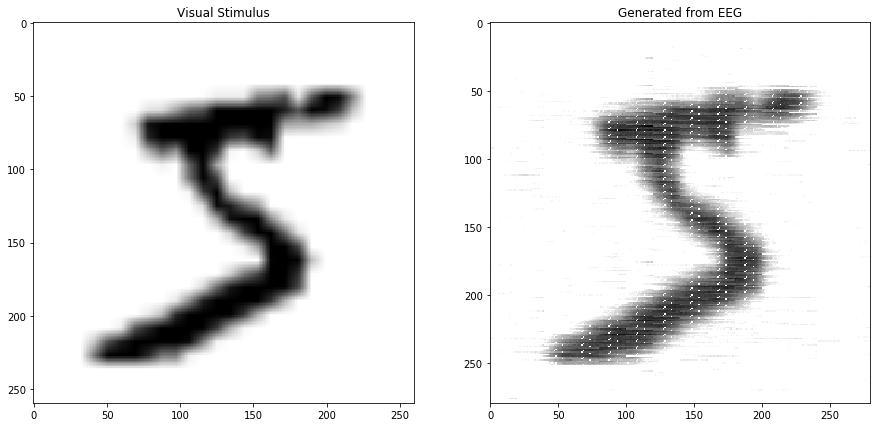

In [17]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
_ = plt.imshow(img,cmap = plt.cm.binary)
_ = plt.title("Visual Stimulus")
plt.subplot(1,2,2)
_ = plt.imshow(x_train_encoded,cmap=plt.cm.binary)
_ = plt.title("Generated from EEG")

In [18]:
plt.imsave("generated.jpg",x_train_encoded)